In [3]:
import pandas as pd
import numpy as np
import requests
import json

# API Data

In [2]:
with open("token.txt", "r") as file:
    access_token = file.read().strip()

headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {access_token}"
}

In [32]:
def get_movie_data(tmdb_links:pd.DataFrame, headers:dict=headers) -> pd.DataFrame:
    """Using TMDb API, get additional details for a list of movie ids
    
    Args:
        movie_ids (list): TMDb ids of movies
        headers (dict, optional): API access headers. Defaults to headers.
        
    Returns:
        pd.DataFrame: dataframe of movie details
    """
    
    movie_details = {
        "movieId": [],
        "id": [],
        "title": [],
        "overview": [],
        "tagline": [],
        "runtime": [],
        "budget": [],
        "revenue": [],
        "genres": [],
        "popularity": [],
        "vote_average": [],
        "vote_count": [],
        "production_companies": [],
        "production_countries": [],
        "release_date": [],
        "origin_country": [],
        "belongs_to_collection": [],
        "homepage": [],
        "original_language": [],
        "poster_path": [],
    }


    for idx, row in tmdb_links.iterrows():
        
        tmdb_id = row["tmdbId"]
        movieId = row["movieId"]
        movie_details["movieId"].append(movieId)
        
        url = f"https://api.themoviedb.org/3/movie/{tmdb_id}?language=en-US"
        
        response = requests.get(url, headers=headers)
        
        details = json.loads(response.text)
        
        
        for key in movie_details.keys():
            if key == "movieId":
                continue
            if key not in details:
                details[key] = None
            if key == "genres":
                genres = None
                if details["genres"]:
                    genres = [genre["name"] for genre in details["genres"]]
                movie_details[key].append(genres)
            elif key == "production_companies":
                producers = None
                if details["production_companies"]:
                    producers = [company["name"] for company in details["production_companies"]]
                movie_details[key].append(producers)
            elif key == "production_countries":
                countries = None
                if details["production_countries"]:
                    countries = [country["name"] for country in details["production_countries"]]
                movie_details[key].append(countries)
            elif key == "belongs_to_collection":
                collection = None
                if details["belongs_to_collection"]:
                    collection = details["belongs_to_collection"]["name"]
                movie_details[key].append(collection)
            else:
                movie_details[key].append(details[key])
    
    return pd.DataFrame(movie_details)

In [24]:
link_file_path = "Data/ml-latest-small/links.csv"
movie_file_path = "Data/ml-latest-small/movies.csv"

In [33]:
links = pd.read_csv(link_file_path)
movies = pd.read_csv(movie_file_path)


links.dropna(subset=["tmdbId"], inplace=True)
links["tmdbId"] = links["tmdbId"].astype(int)
tmdb_links = links[["movieId", "tmdbId"]]

In [36]:
movie_data = get_movie_data(tmdb_links)

In [41]:
movie_data["poster_url"] = movie_data["poster_path"].apply(lambda x: f"https://image.tmdb.org/t/p/w200{x}")

In [42]:
movie_data.head()

,movieId,id,title,overview,tagline,runtime,budget,revenue,genres,popularity,...,vote_count,production_companies,production_countries,release_date,origin_country,belongs_to_collection,homepage,original_language,poster_path,poster_url
0,1,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Hang on for the comedy that goes to infinity a...,81.0,30000000.0,394436586.0,"[Animation, Adventure, Family, Comedy]",15.4479,...,18703.0,[Pixar],[United States of America],1995-11-22,[US],Toy Story Collection,http://toystory.disney.com/toy-story,en,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,https://image.tmdb.org/t/p/w200/uXDfjJbdP4ijW5...
1,2,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,104.0,65000000.0,262821940.0,"[Adventure, Fantasy, Family]",2.5285,...,10694.0,"[TriStar Pictures, Interscope Communications, ...",[United States of America],1995-12-15,[US],Jumanji Collection,http://www.sonypictures.com/movies/jumanji/,en,/p67m5dzwyxWd46a6of2c9IVfQz7.jpg,https://image.tmdb.org/t/p/w200/p67m5dzwyxWd46...
2,3,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,101.0,25000000.0,71500000.0,"[Romance, Comedy]",1.0396,...,393.0,"[Lancaster Gate, Warner Bros. Pictures]",[United States of America],1995-12-22,[US],Grumpy Old Men Collection,,en,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,https://image.tmdb.org/t/p/w200/1FSXpj5e8l4KH6...
3,4,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,127.0,16000000.0,81452156.0,"[Comedy, Drama, Romance]",0.7416,...,170.0,[20th Century Fox],[United States of America],1995-12-22,[US],None,,en,/qJU6rfil5xLVb5HpJsmmfeSK254.jpg,https://image.tmdb.org/t/p/w200/qJU6rfil5xLVb5...
4,5,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just when his world is back to normal... he's ...,106.0,0.0,76594107.0,"[Comedy, Family]",1.4936,...,749.0,"[Touchstone Pictures, Sandollar Productions]",[United States of America],1995-12-08,[US],Father of the Bride (Steve Martin) Collection,,en,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,https://image.tmdb.org/t/p/w200/rj4LBtwQ0uGrpB...


In [43]:
movie_data.to_csv("Data/tmdb_movie_details.csv", index=False)

# UMAP Test

In [30]:
# UMAP Test
scaled_data = pd.read_csv("Data/scaled_movie_data.csv").drop(columns=["cluster_label"])
class_labels = pd.read_csv("Data/scaled_movie_data.csv")["cluster_label"]
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.570263,-1.004811,0.309406,2.388071,5.782021,1.743946,5.334813,-0.504873,-0.52188,-0.137197,...,-0.324852,-0.125484,-0.289654,-0.194118,-0.348891,-0.194706,-0.507025,-0.429541,3.861189,2.408319
1,-0.482593,-0.026080,1.318243,1.454618,-1.683496,0.799862,2.829606,-0.504873,-0.52188,-0.137197,...,3.078325,-0.125484,-0.289654,-0.194118,-0.348891,-0.194706,-0.507025,-0.429541,-0.258988,2.408319
2,-0.408366,-0.153740,0.165286,0.097703,-0.045414,-0.026213,-0.391419,-0.504873,-0.52188,-0.137197,...,-0.324852,-0.125484,-0.289654,-0.194118,-0.348891,-0.194706,1.972290,-0.429541,-0.258988,-0.415227
3,-0.235320,0.952652,-0.094129,0.168287,-0.058865,-0.262234,-0.460338,-0.504873,-0.52188,-0.137197,...,-0.324852,-0.125484,-0.289654,-0.194118,-0.348891,-0.194706,1.972290,-0.429541,-0.258988,-0.415227
4,-0.449444,0.059027,-0.555312,0.133832,-0.040459,-0.380245,-0.281462,-0.504873,-0.52188,-0.137197,...,-0.324852,-0.125484,-0.289654,-0.194118,-0.348891,-0.194706,-0.507025,-0.429541,-0.258988,-0.415227


In [64]:

from umap import UMAP

umap_model = UMAP(n_neighbors=100, min_dist=0.5, metric='euclidean')

umap_embedding = umap_model.fit_transform(scaled_data)

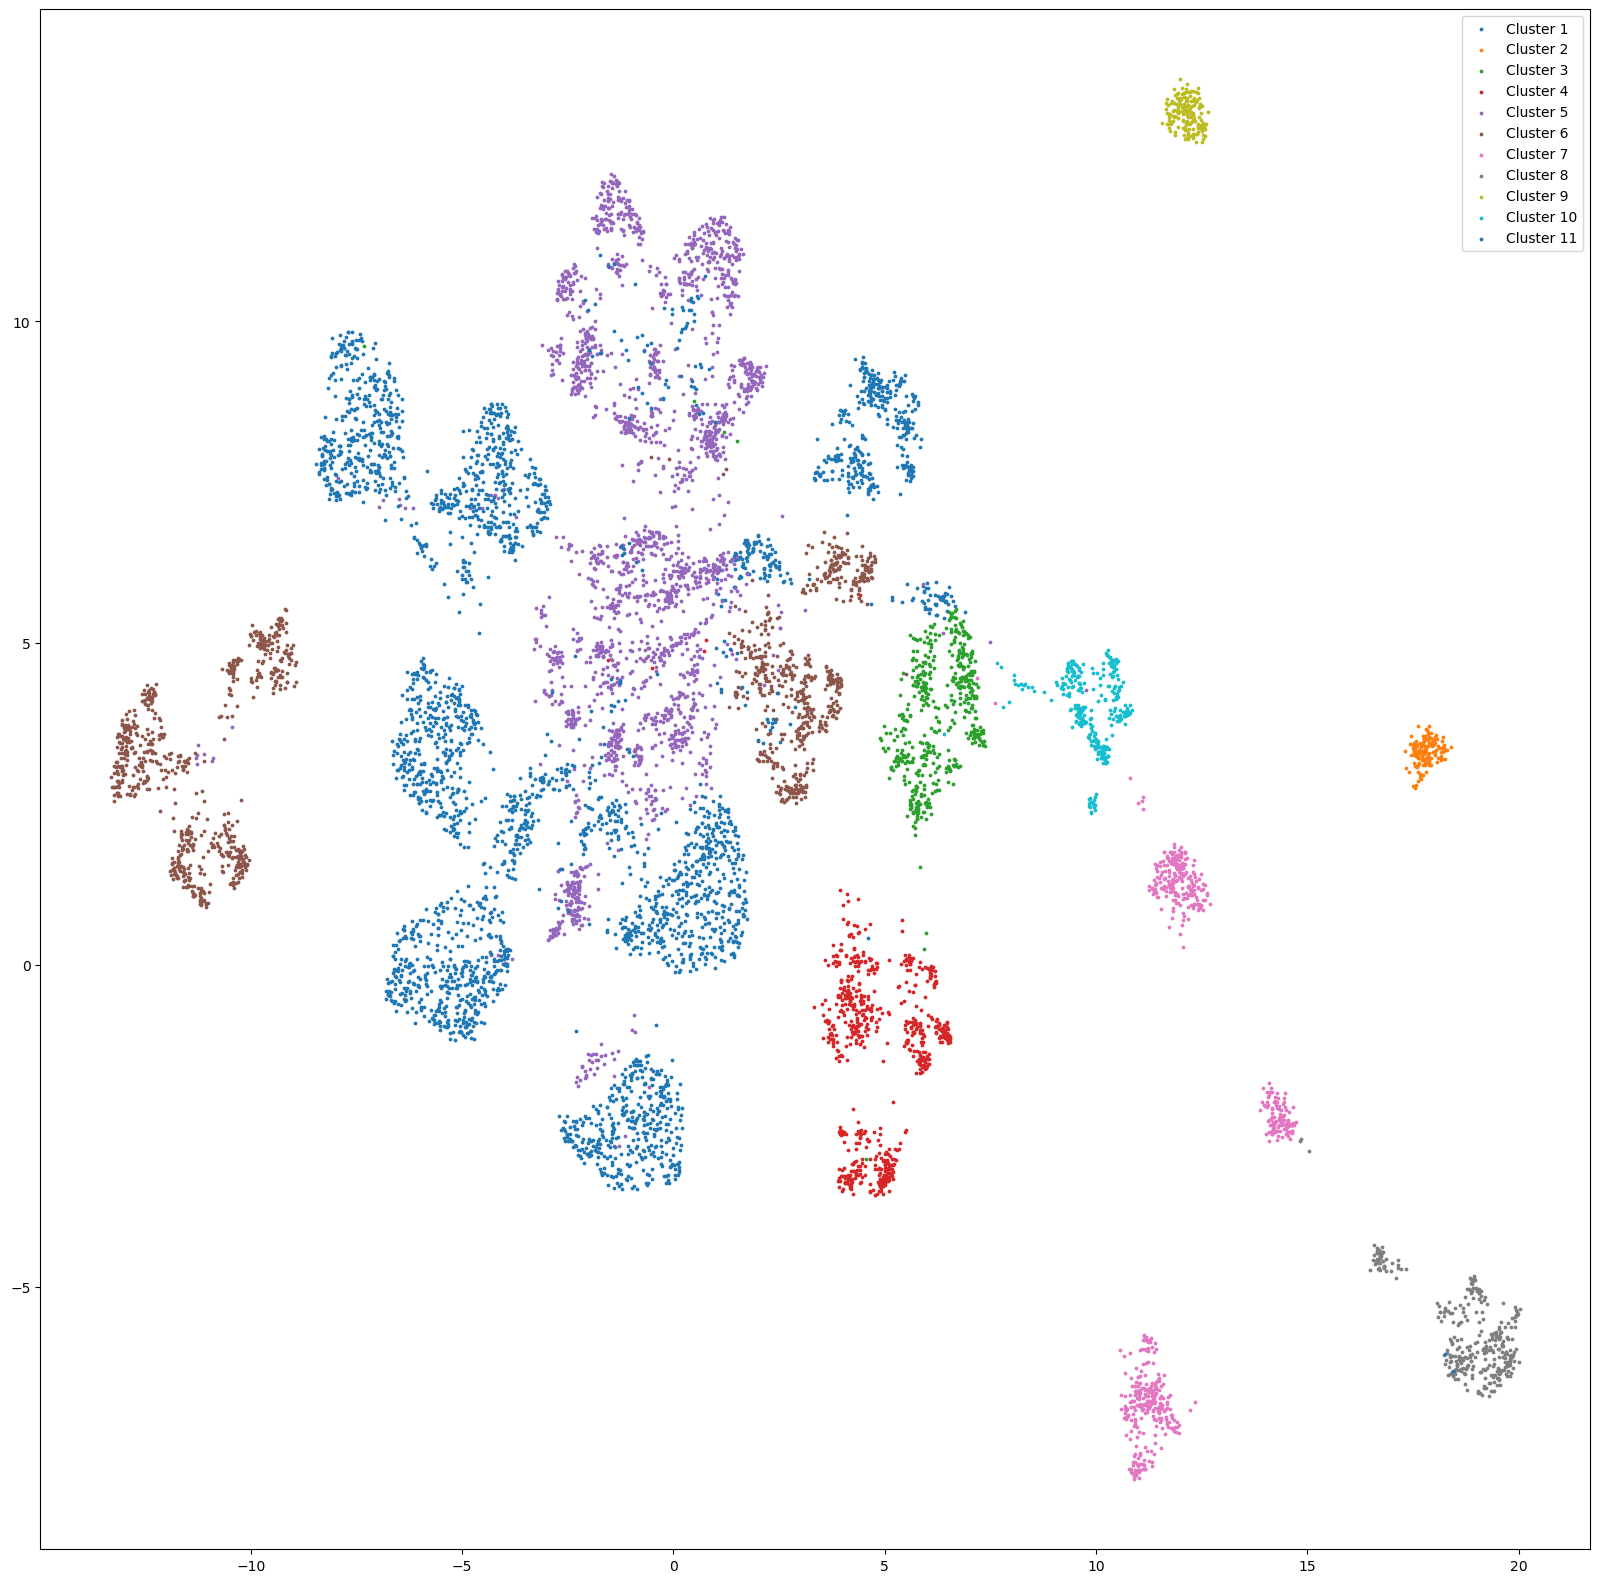

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i in range(1, 12):
    plt.scatter(umap_embedding[class_labels == i, 0], umap_embedding[class_labels == i, 1], label=f"Cluster {i}", s=3)
plt.legend()

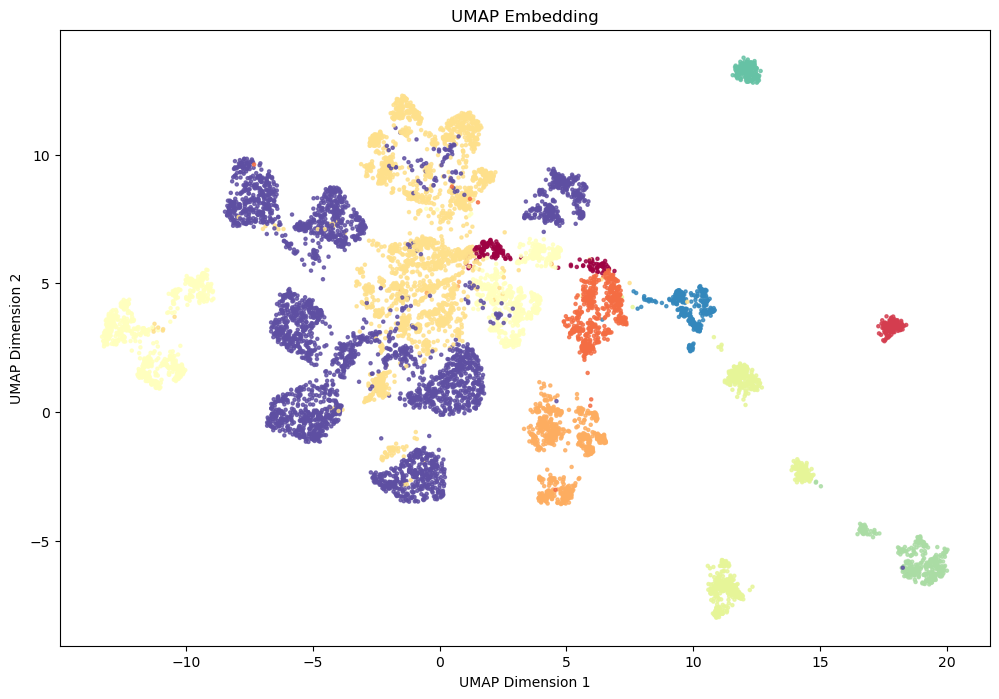

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c=class_labels, cmap='Spectral', alpha=0.8)
plt.title("UMAP Embedding")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()
